<a href="https://colab.research.google.com/github/manifoldailearning/Deep-Learning-2020/blob/master/Class_9_%26_10_Deep_learning_2020_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Watch on our Youtube Channel:

Part 1:https://youtu.be/itwg_oBKQyM

Part 2: https://youtu.be/2vtnA9RR-VU

Subscribe for Latest Updates on Data Science - ML  - DL : 
http://youtube.com/manifoldailearning

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = boston.data

In [ ]:
y = boston.target

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df = pd.DataFrame(X,columns = boston.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df["target"] = y

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets = train_test_split(df.drop(["target"],axis=1)
                                                                   ,df["target"],test_size=0.3,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets = train_test_split(X
                                                                   ,y,test_size=0.3,random_state=42)

In [ ]:
train_data

array([[2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.31580e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [ ]:
#Shapes
train_data.shape
test_data.shape

(354, 13)

(152, 13)

In [ ]:
type(train_data)

numpy.ndarray

In [ ]:
train_targets

array([28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. , 29.6, 18.7, 21.7,
       23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1, 19.8, 21. , 41.3,
       23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1,
       26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5, 12.7,  5.6, 31.1,
       26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25. ,
       50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8,
       21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. , 33.3, 17.8, 50. ,
       20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7,
       24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8, 19.3, 23.9, 24.7,
       19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11. ,
       24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7, 30.1, 20.5, 32.5,
       42.3, 24.3, 20.6, 22. , 18.2, 15. ,  6.3, 20.1, 21.4, 28.4, 30.1,
       20.8, 23. , 14.3, 11.7, 37.3, 17.1, 10.4, 23. , 22.7, 20.3, 21.7,
       50. ,  8.4, 18.8, 37.2, 16.1, 16.5, 22.2, 20

In [ ]:
test_targets

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

### Data Normalization

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
transformed_train_data = ss.fit_transform(train_data)
transformed_test_data = ss.transform(test_data)

In [ ]:
transformed_train_data.shape
transformed_test_data.shape

(354, 13)

(152, 13)

mean = 0 , std = 1

In [ ]:
transformed_train_data.mean(axis=0)

array([-1.26232985e-16, -4.82978378e-17,  3.72473552e-15, -6.68015549e-17,
       -5.44322904e-15, -1.59406386e-15, -6.96241558e-17, -2.24459497e-15,
       -8.18554264e-17, -1.89035855e-16,  1.72849807e-14,  8.11654573e-15,
       -7.53320821e-16])

In [ ]:
transformed_train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
transformed_train_data

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

### Building a Neural Network

In [ ]:
from tensorflow.keras import models,layers

#Creating our Deep Neural Networks - Training data is very less
network = models.Sequential()
network.add(layers.Dense(32, activation='relu',
                       input_shape=(transformed_train_data.shape[1],)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
network.fit(transformed_train_data,train_targets)

## K - Fold Validation

In [ ]:
np.random.seed(6)
X = np.random.randint(0,1000,(12,6))
X

array([[906, 713, 227, 980, 618, 365],
       [335, 362, 848, 318, 281, 513],
       [ 75, 333, 697,  26, 495, 161],
       [748, 622, 324, 929, 264, 130],
       [204, 980, 987,  31, 450, 901],
       [637, 410, 527, 473, 342, 626],
       [939, 197, 485, 433, 644, 485],
       [ 62, 592, 194, 127, 322, 319],
       [147, 597, 636, 284, 555,  57],
       [901, 306, 538, 846, 119, 808],
       [965, 326, 234, 730,  63, 778],
       [835, 341, 907, 129,  82, 931]])

In [ ]:
k = 4
num_val_samples = len(X) // k
print(num_val_samples) #3
print(X)
for i in range(k):
    print("Fold #",i)
    X_val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    X_train_data = np.concatenate(
        [X[:i * num_val_samples],
         X[(i + 1) * num_val_samples:]],
        axis=0)
    print("Val data with fold:",i)
    X_val_data
    print("Train data with fold:",i)
    X_train_data

3
[[906 713 227 980 618 365]
 [335 362 848 318 281 513]
 [ 75 333 697  26 495 161]
 [748 622 324 929 264 130]
 [204 980 987  31 450 901]
 [637 410 527 473 342 626]
 [939 197 485 433 644 485]
 [ 62 592 194 127 322 319]
 [147 597 636 284 555  57]
 [901 306 538 846 119 808]
 [965 326 234 730  63 778]
 [835 341 907 129  82 931]]
Fold # 0
Val data with fold: 0


array([[906, 713, 227, 980, 618, 365],
       [335, 362, 848, 318, 281, 513],
       [ 75, 333, 697,  26, 495, 161]])

Train data with fold: 0


array([[748, 622, 324, 929, 264, 130],
       [204, 980, 987,  31, 450, 901],
       [637, 410, 527, 473, 342, 626],
       [939, 197, 485, 433, 644, 485],
       [ 62, 592, 194, 127, 322, 319],
       [147, 597, 636, 284, 555,  57],
       [901, 306, 538, 846, 119, 808],
       [965, 326, 234, 730,  63, 778],
       [835, 341, 907, 129,  82, 931]])

Fold # 1
Val data with fold: 1


array([[748, 622, 324, 929, 264, 130],
       [204, 980, 987,  31, 450, 901],
       [637, 410, 527, 473, 342, 626]])

Train data with fold: 1


array([[906, 713, 227, 980, 618, 365],
       [335, 362, 848, 318, 281, 513],
       [ 75, 333, 697,  26, 495, 161],
       [939, 197, 485, 433, 644, 485],
       [ 62, 592, 194, 127, 322, 319],
       [147, 597, 636, 284, 555,  57],
       [901, 306, 538, 846, 119, 808],
       [965, 326, 234, 730,  63, 778],
       [835, 341, 907, 129,  82, 931]])

Fold # 2
Val data with fold: 2


array([[939, 197, 485, 433, 644, 485],
       [ 62, 592, 194, 127, 322, 319],
       [147, 597, 636, 284, 555,  57]])

Train data with fold: 2


array([[906, 713, 227, 980, 618, 365],
       [335, 362, 848, 318, 281, 513],
       [ 75, 333, 697,  26, 495, 161],
       [748, 622, 324, 929, 264, 130],
       [204, 980, 987,  31, 450, 901],
       [637, 410, 527, 473, 342, 626],
       [901, 306, 538, 846, 119, 808],
       [965, 326, 234, 730,  63, 778],
       [835, 341, 907, 129,  82, 931]])

Fold # 3
Val data with fold: 3


array([[901, 306, 538, 846, 119, 808],
       [965, 326, 234, 730,  63, 778],
       [835, 341, 907, 129,  82, 931]])

Train data with fold: 3


array([[906, 713, 227, 980, 618, 365],
       [335, 362, 848, 318, 281, 513],
       [ 75, 333, 697,  26, 495, 161],
       [748, 622, 324, 929, 264, 130],
       [204, 980, 987,  31, 450, 901],
       [637, 410, 527, 473, 342, 626],
       [939, 197, 485, 433, 644, 485],
       [ 62, 592, 194, 127, 322, 319],
       [147, 597, 636, 284, 555,  57]])

##### On Each Fold - We have to Train & Evaluate using our Deep Neural Network

##### Create a Model as Funtion

In [ ]:
def build_nn():
    network = models.Sequential()
    network.add(layers.Dense(64, activation='relu',
                           input_shape=(transformed_train_data.shape[1],)))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # MSE Loss & MAE Loss - Regression task
    return network

In [ ]:
k = 4
num_val_samples = len(transformed_train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = transformed_train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [transformed_train_data[:i * num_val_samples],
         transformed_train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_nn()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation MAE')

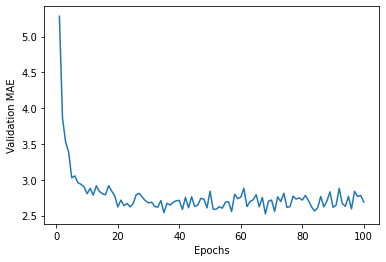

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation MAE')

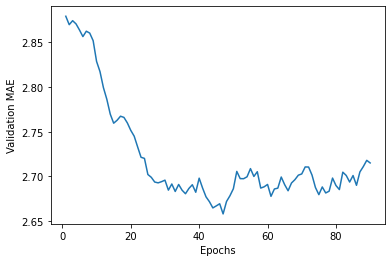

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
model = build_nn()
# Train it on the entirety of the data.
model.fit(transformed_train_data,train_targets,
          epochs=43, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(transformed_test_data, test_targets)

5/5 [==============================] - 0s 1ms/step - loss: 11.8961 - mae: 2.3204


In [ ]:
test_mae_score

2.3204376697540283